In [1]:
import numpy as np
import torch
from models import Generator
import matplotlib.pyplot as plt
import torchvision.utils as vutils

In [2]:
model_path = "./models/first_model_299"

In [3]:
def get_netG(model_path):
    device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

    # Load Model
    checkpoint = torch.load("".join([model_path, ".pt"]), map_location=device)
    nz = checkpoint["latent_vector_size"]
    ngf = checkpoint["feature_maps_size"]
    nc = checkpoint["channels_num"]
    netG_params = {
        "latent_vector_size": nz,
        "feature_maps_size": ngf,
        "channels_num": nc
    }
    # Crate and load generator
    netG = Generator(**netG_params).to(device)
    netG.load_state_dict(checkpoint["netG_state_dict"])
    print(netG)
    netG.eval()
    
    return netG, nz, device

In [33]:
netG, nz, device = get_netG(model_path)

print(type(latent_code))
# print(latent_code)

def generate_image(latent_code):
        img = netG(latent_code).detach().numpy().squeeze()
        img = (img + 1) / 2
        print(img.min(), img.max(), img.mean())
        plt.imshow(np.transpose(img, (1,2,0)))

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


0.0030114055 0.83042955 0.08764848


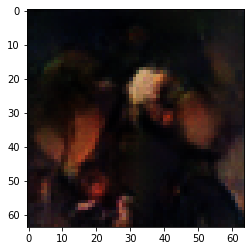

In [42]:
latent_code = torch.randn(1, nz, 1, 1, device=device)
generate_image(latent_code)

In [43]:
def generate_and_plot(netG, num, nz, device, model_name, fig_size=(10,10)):
    imgs = netG(torch.randn(num, nz, 1, 1, device=device)).detach()
    _ = plt.figure(figsize=fig_size)
    plt.axis("off")
    plt.title(f"Generated Images from Model {model_name}")
    plt.imshow(np.transpose(vutils.make_grid(imgs, nrow=int(np.sqrt(num)), padding=5, normalize=True), (1,2,0)))

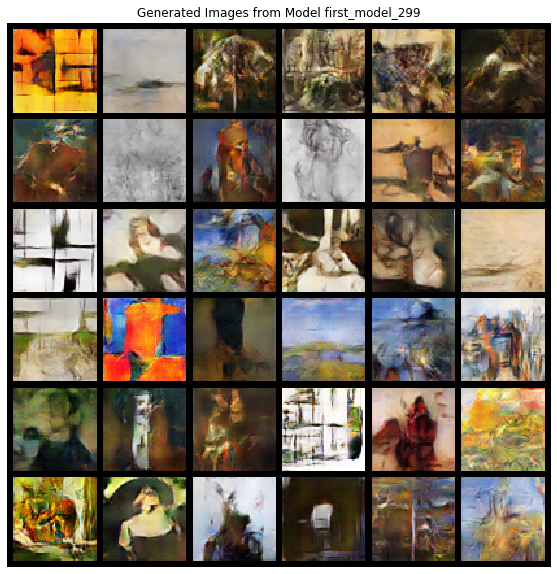

In [44]:
generate_and_plot(netG, 36, nz, device, model_path.split("/")[-1])